# MTH 9879 Market Microstructure Models,    Spring 2015 

## Lecture 4: Understanding the bid-ask spread

Tai-Ho Wang    
Department of Mathematics   
  
  
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BCCUNYstacked_BLK.jpg" align = "center" width=160></h2>  

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\underbar}{\underline}
$$


## Outline of Lecture 4

-   The Roll model

-   TAQ data cleaning and trade signing

-   A generalization of the Roll model

-   The Glosten and Milgrom model

-   The Foucault (1999) model

-   The Glosten and Harris model

-   The Madhavan-Richardson-Roomans model

-   The Huang and Stoll model

-   PIN - the probability of informed trading



### The Roll model

-   We think of the efficient price
    $m_t=\mathbb{E} [\tilde S|\mathcal{F} _t]$ as being the expected
    value of the cashflows of a security, conditioning on all public
    information.


-   We model trade prices $p_t$ as

    <a name="eq:Roll"></a>(1)
    $$p_t=m_{t}+c\,\epsilon_t$$

    where (under competition), $c$ is the market maker($\mathcal{M}$)’s
    cost to trade and $\epsilon_t=\pm1$ is a trade sign indicator.


-   We further assume that trade signs are serially independent with
    equal probabilities of buys and sells.



### The Roll model

Under these (very unrealistic) assumptions, we have

\begin{eqnarray*}
\gamma_0:=\mbox{Var}[\Delta p_t]&=&\mathbb{E} [\Delta p_t^2]\\
&=&\mathbb{E} [\Delta m_t^2]+c^2\,\mbox{Var}[\epsilon_t-\epsilon_{t-1}]\\
&=&\sigma^2+2\,c^2\end{eqnarray*}

where $\sigma$ is the volatility of the stock per trade.

Also,

\begin{eqnarray*}
\gamma_1:&=&\mbox{Cov}[\Delta p_{t-1},\Delta p_t]\\
&=&\mathbb{E} [\Delta p_{t-1}\,\Delta p_t]\\
&=&\mathbb{E} [\left\{\Delta m_{t-1}+c\,(\epsilon_{t-1}-\epsilon_{t-2})\right\}\left\{\Delta m_{t}+c\,(\epsilon_{t}-\epsilon_{t-1})\right\}]\\
&=&-c^2\end{eqnarray*}

Higher order autocovariances are all zero.



### The Roll model

We conclude that the effective half-spread is given by
$$c=\sqrt{-\gamma_1}$$ and $$\sigma^2=\gamma_0+2\,\gamma_1$$ The first
order autocovariance is negative because of bid-ask bounce.



### Autocorrelation of BAC price changes

In [2]:
%load_ext rmagic

In [3]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tqBAC_20130731.zip", destfile="tqBAC_20130731.zip")
unzip(zipfile="tqBAC_20130731.zip")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip'
Content type 'application/zip' length 695952 bytes (679 Kb)
opened URL
downloaded 679 Kb

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tqBAC_20130731.zip'
Content type 'application/zip' length 105990 bytes (103 Kb)
opened URL
downloaded 103 Kb



In [4]:
%%R

library(xts)
library(highfrequency)
library(quantmod)

load("tq.rData")
tqdata <- tqBAC

In [5]:
%R data.frame(head(tqdata))

array([[1, 1, 1, 1, 1, 1],
       [2, 5, 3, 2, 4, 1],
       [2, 1, 2, 2, 2, 3],
       [5, 4, 1, 3, 6, 2],
       [2, 1, 1, 2, 2, 1],
       [2, 1, 1, 1, 1, 2],
       [5, 6, 3, 1, 2, 4],
       [2, 2, 1, 1, 2, 2],
       [6, 5, 4, 1, 3, 2]], dtype=int32)

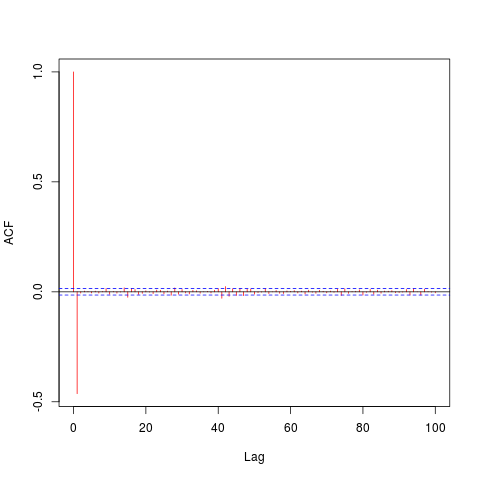

In [7]:
%%R
#---------------------------------------------------------------------------
# Figure 1: Autocorrelation of BAC price changes
p <- as.numeric(tqdata$PRICE)
dp <- diff(p)
ac <- acf(dp,lag=100,plot=FALSE)
plot(ac,col="red",main=NA)

Figure 1: Autocorrelation of BAC price changes (04-May-2012)

### 5 minutes of BAC trades

In [10]:
%%R

# 5 minutes of BAC trades
min5 <- '2012-05-04 11:50:00::2012-05-04 11:55:00'
plot(tqdata$BID[min5],ylim=c(7.7,7.8),main=NA)
lines(tqdata$OFR[min5],col="red")
points(tqdata$PRICE[min5][tqdata$EX[min5]=="D"],col="red",pch=20)
points(tqdata$PRICE[min5][tqdata$EX[min5]=="B"],col="blue",pch=20)
points(tqdata$PRICE[min5][tqdata$EX[min5]=="Z"],col="orange",pch=20)
points(tqdata$PRICE[min5][tqdata$EX[min5]=="Y"],col="purple",pch=20)
points(tqdata$PRICE[min5][tqdata$EX[min5]=="P"],col="dark green",pch=20)
legend("topright", c("D - FINRA           ",
                     "B - NASDAQ OMX BX",
                     "Z - BATS Exchange",
                     "Y - BATS Y-Exchange",
                     "P - NYSE Arca SM"), text.width = strwidth("Y - BATS Y-Exchange Y 1,000,000"),
       col=c("red","blue","orange","purple", "dark green"), pch=20, inset=0.05)

Error in plot.xts(tqdata$BID[min5], ylim = c(7.7, 7.8), main = NA) : 
  'x' must be a time-series object


Figure 2: BAC trades (04-May-2012)

### 10 minutes of BAC trades from a later date

In [11]:
%%R

load("tqBAC_20130731.rData")

# The data is a list of xts objects by exchange.  Consolidate into one object
tqdata <- NULL
for(i in 1:8){tqdata <- rbind(tqdata,tqBAC[[i]])}

#---------------------------------------------------------------------------
# Figure 3: 10 minutes of BAC trades
min10 <- '2013-07-31 11:15:00::2013-07-31 11:25:00'

plot(tqdata$BID[min10],ylim=c(14.72,14.80),main=NA)
lines(tqdata$OFR[min10],col="red")
points(tqdata$PRICE[min10][tqdata$EX[min10]=="D"],col="red",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="T"],col="blue",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="P"],col="pink",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="Z"],col="orange",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="Y"],col="purple",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="K"],col="dark green",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="B"],col="green",cex=1.5,pch=20)
points(tqdata$PRICE[min10][tqdata$EX[min10]=="N"],col="brown",cex=1.5,pch=20)

legend("topright", c("D - FINRA           ",
                     "T - NASDAQ",
                     "P - NYSE Arca",
                     "Z - BATS Exchange",
                     "Y - BATS Y-Exchange",
                     "K - DirectEdge X",
                     "B - NASDAQ BX",
                     "N - NYSE"
                     ), text.width = strwidth("Y - BATS Y-Exchange Y 1,000,000"),
       col=c("red","blue","pink","orange","purple", "dark green","green","brown"), cex=1.5, pch=20, inset=0.05)

Error in plot.xts(tqdata$BID[min10], ylim = c(14.72, 14.8), main = NA) : 
  'x' must be a time-series object


Figure 3: BAC trades (31-Jul-2013)

### Signing trades: The Lee and Ready tick test

Lee and Ready devised a simple method to infer trade direction in cases
when quote data (and so mid-price) is not available:

-   If a trade is on an uptick, it is a buy.

-   If the trade is on a downtick, it is a sell.

-   If the trade is on a zero-uptick, it is a buy.

-   If the trade is on a zero-downtick, it is a sell.

It can be verified that this algorithm classifies most trades in the
same way as the classification based on comparison with the mid-price.
However, note that according to Bandi and Russell “the Lee and Ready
method, for example, is known to categorize incorrectly about 15% of the
trades”.



### Bessembinder recommendation

-   If quotes are available, Lee and Ready (1991) recommend comparing
    current trade prices with quotes lagged by around 5 seconds.

-   Ellis, Michaely, and O’Hara (EMO) assign trades executed at the ask
    (bid) quote as buys (sells), while using the tick test for all other
    trades.

However, [Bessembinder]<sup id="cite_ref-Bessembinder" class="reference"><a href="#cite_note-Bessembinder"><span>[</span>2<span>]</span></a></sup> (in a 2003 paper) recommends as follows:

1.  Use the EMO technique in preference to the LR method to sign trades

2.  Implement the EMO technique on the basis of contemporaneous rather
    than earlier quotations

3.  Use quotation midpoints in effect somewhat prior to the trade report
    time as the benchmark quote when measuring effective bid-ask
    spreads.

### TAQ data cleaning

Data cleaning is critical. Here follows a recipe for TAQ cleaning due to
[Barndorff-Nielsen et al.]<sup id="cite_ref-BNS" class="reference"><a href="#cite_note-BNS"><span>[</span>1<span>]</span></a></sup> and implemented in the R-package <span>highfrequency</span>:

<span>**All data**</span>

- Delete entries with a timestamp outside the 9:30am–4pm window when the exchange is open.
- Delete entries with a bid, ask or transaction price equal to zero.
- Retain entries originating from a single exchange (NYSE in our application). Delete other entries.

<span>**Quote data only**</span>

- When multiple quotes have the same time stamp, we replace all these with a single entry with the median bid and median ask price.
- Delete entries for which the spread is negative.
- Delete entries for which the spread is more that 50 times the median spread on that day.
- Delete entries for which the mid-quote deviated by more than 10 mean absolute deviations from a rolling centered median (excluding the observation under consideration) of 50 observations (25 observations before and 25 after).

<span>**Trade data only**</span>

- Delete entries with corrected trades. (Trades with a Correction Indicator, CORR $\neq$ 0).
- Delete entries with abnormal Sale Condition. (Trades where COND has a letter code, except for E and F). See the TAQ 3 Users Guide for additional details about sale conditions.
- If multiple transactions have the same time stamp, use the median price.
- Delete entries with prices that are above the ask plus the bid–ask spread. Similar for entries with prices below the bid minus the bid–ask spread.



### Autocorrelation of BAC trade signs

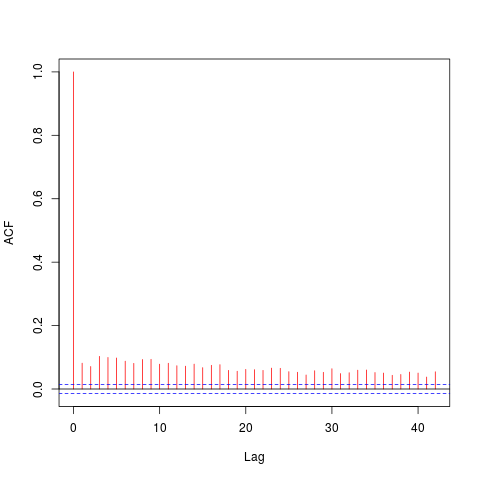

In [12]:
%%R

load("tq.rData")
tqdata <- tqBAC

# Compute trade signs
tradeSigns <- getTradeDirection(tqdata) 

# Autocorrelation of trade signs
acTS <- acf(tradeSigns,main=NA,plot=FALSE)
plot(acTS,main=NA,col="red")

Figure 4: Autocorrelation of trade signs (04-May-2012)

### Estimate of Roll model using trade signs

-   Recall the Roll model: $$p_t=m_{t}+c\,\epsilon_t.$$


-   The Roll half-spread estimate just from trade data was $0.295$
    cents.


-   Now that we have trade signs, we may use these to estimate the
    half-spread from the regression
    $$\Delta p_t=\Delta m_t+c\,(\epsilon_t-\epsilon_{t-1})$$ The
    resulting estimate of the half-spread in this case is $0.264$ cents.


-   Only the first order autocorrelation coefficient of price changes is
    significant, consistent with the Roll model.


-   Trade signs are very autocorrelated with all coefficients
    significant.



### A generalization of the Roll model

-   As before, we model trade prices $p_t$ as
    $$p_t=m_{t}+c\,\epsilon_t$$ but we allow the evolution of the
    efficient price to depend on the trade sign:
    
    <a name="eq:GRoll"></a>(2)
    $$\Delta m_t=m_t-m_{t-1}=\lambda\,\epsilon_t+u_t$$

    with $\mbox{Cov}[\epsilon_t,u_t]=0$.

    -   This could reflect market impact and/or asymmetric information.


-   Autocovariances are:

    \begin{eqnarray*}
    \gamma_0&=&\mathbb{E} [\Delta p^2]=c^2+(c+\lambda)^2+\sigma_u^2\\
    \gamma_1&=&\mathbb{E} [\Delta p_t\, \Delta p_{t-1}]=-c\,(c+\lambda)\end{eqnarray*}


-   All higher order autocovariances are zero.



### Estimation of parameters

-   The variance of the efficient price is given by
    $$\mbox{Var}[\Delta m_t]=\lambda^2+\sigma_u^2=\gamma_0+2\,\gamma_1$$


-   Thus $\gamma_0$ and $\gamma_1$ are not sufficient to identify $c$
    and $\lambda$ separately.


-   With synchronized quotes or alternatively trade sign data, we can
    identify $\lambda$ and $c$ separately by regression. <br>
    (Recall that $\Delta p_t = (\lambda + c)\epsilon_t - c\epsilon_{t-1} + u_t$)

    -   With our BAC data, we get $\lambda = 0.054$ cents and
        $c = 0.234$ cents.



### Empirical notions of spread

-   <span>**The effective spread**</span>
    $$s^E=\langle  2\,\epsilon_t\,(p_t-m_t)  \rangle$$


-   <span>**The realized spread**</span>
    $$s^R=\langle  2\,\epsilon_t\,(p_t-m_{t+\tau})  \rangle$$ for some
    $\tau >0$ (5 minutes say).


-   In the Roll model, the two notions of spread coincide but if trading
    affects the mid-price, the two notions will not in general agree.

    -   Note that we don’t need to believe in asymmetric information to
        believe in market impact. Recall that there is market impact in
        the zero-intelligence model.


-   In general, empirically, the realized spread is smaller than the
    effective spread.

    -   With our BAC data, the effective spread is $0.283$ cents and
        the realized spread after 500 trades is $0.146$ cents.



### BAC realized spread over time

In [13]:
%%R

mids <- (as.numeric(tqdata$OFR) + as.numeric(tqdata$BID))/2

# Realized spread
n <- length(p)
rs <- function(lag){mean(tradeSigns[1:(n-lag)]*(p[1:(n-lag)]-mids[-(1:lag)]))}

In [14]:
%R data.frame(rs(500))

array([[ 0.00146451]])

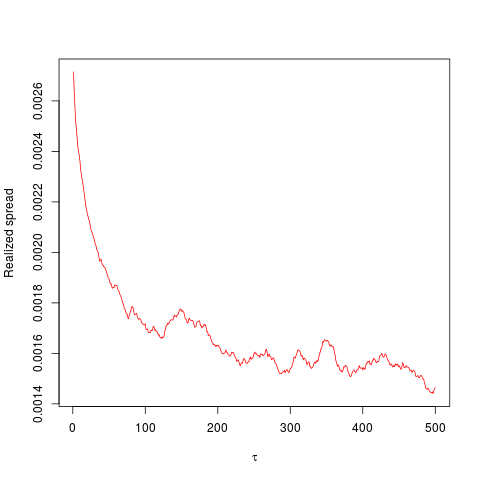

In [15]:
%%R 
rsLag <- sapply(1:500,rs)
plot(1:500,rsLag,col="red",type="l",xlab=expression(tau), ylab = "Realized spread")

Figure 5: Realized BAC spread vs number of trades after execution (04-May-2012)

### BAC realized spread by reporting exchange


<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/realizedSpreadByExch.png" align = "center" width=550></h2>

Figure 6: Different exchanges have different realized spread profiles depending on fee structure.

### Determinants of the bid-ask spread

Recall that there are three main determinants of the bid-ask spread:

-   Processing costs (which include the profit of the market maker)

-   Inventory costs such as cost of risk capital

-   Adverse selection

In the Roll model, only processing costs are taken into account. In the
generalized Roll model, adverse selection is also taken into account.



### Models with asymmetric information

There are two main classes of model with asymmetric information:

-   Strategic trader models where typically a single informed trader
    optimizes his use of information.

    -   A good example is the Kyle model which we will cover in the next
        lecture.


-   Sequential trader models where randomly selected traders arrive one
    after the other, independently.

    -   The prototypical example is Glosten and Milgrom (1985).


-   In sequential trader models, the spread set by the market maker
    compensates for adverse selection.



### A sequential trade model (Glosten and Milgrom)

-   In the Glosten and Milgrom model, the market maker $\mathcal{M}$
    learns the informed trader $\mathcal{I} $’s information by observing
    the order flow.

    -   If there are more buys than sells over time, $\mathcal{M}$ sets
        the price higher.

-   $\mathcal{M}$ posts bid and ask prices $B$ and $A$.

-   The value of the security is either high ($\bar V$) with probability
    $\delta$ or low ($\underbar V$).

-   A trader is drawn at random: either informed $\mathcal{I} $ with
    probability $\mu$ or uninformed $\mathcal{U}$.



### Sequential trade model event tree

<a name="eq:GlostenMilgromTree"></a>(3)

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/sequentialModelEventTree.png" align = "center" width=500></h2>

### Unconditional probabilities

The unconditional probability of a buy is given by

\begin{eqnarray*}
\Pr[Buy]=\frac{1}{2}\,\left(1-\mu\right)+\delta\,\mu=\frac 12 \,\left\{1-\mu\,(1-2\,\delta)\right\}.\end{eqnarray*}

Similarly, the unconditional probability of a sell is given by

$$\Pr[Sell]=\frac{1}{2} \,(1-\mu)+(1-\delta)\,\mu=\frac 12 \,\left\{1+\mu\,(1-2\,\delta)\right\}.$$

If $\delta = \frac12$, $\Pr[Buy] = \Pr[Sell] = \frac12$.



### Optimal bid price

Under <span>*perfect competition*</span>, the optimal ask price is set
as

\begin{eqnarray*}
A&=&\mathbb{E} [V|Buy]\\
&=&{\bar V\,\Pr(\bar V|Buy)+\underbar V\,\Pr(\underbar V|Buy)}\\
&=&\frac{\bar V\,\Pr(\bar V \cap Buy)+\underbar V\,\Pr(\underbar V \cap Buy)}{\Pr(Buy)}\end{eqnarray*}

By inspection of the Glosten and Milgrom tree [(3)](#eq:GlostenMilgromTree), we have

\begin{eqnarray*}
\Pr(\bar V \cap Buy) &=& \delta\,\left\{\mu+\frac 12 (1-\mu)\right\} = \frac12 \delta (1 + \mu) \\
\Pr(\underbar V \cap Buy) &=& (1-\delta)\,\left\{0+\frac 12 (1-\mu)\right\} = \frac12 (1 - \delta)(1 - \mu)
\end{eqnarray*}

and we already computed that
$\Pr(Buy)=\frac 12 \,\left\{1-\mu\,(1-2\,\delta)\right\}$. So

$$A=\mathbb{E} [V|Buy]=\frac{\underbar V\,(1-\delta)\,(1-\mu)+\bar V\,\delta\,(1+\mu)}{1-\mu\,(1-2\,\delta)}.$$



### The spread

Similarly,

$$B=\mathbb{E} [V|Sell]=\frac{\underbar V\,(1-\delta)\,(1+\mu)+\bar V\,\delta\,(1-\mu)}{1+\mu\,(1-2\,\delta)}$$

so the spread is

$$s=A-B=\frac{4\,(\bar V-\underbar V)\,\mu\,\delta\,(1-\delta)}{1-\mu^2\,(1-2\,\delta)^2}.$$

When $\delta=1/2$, 

$$s=\mu\,(\bar V-\underbar V)$$ 

and in this case, the spread is proportional to the probability of informed trading.



### Observations

-   The mid-price equals the fair price
    $\mathbb{E} [V]=\delta \,\underbar V+(1-\delta)\,\bar V$ only when
    $\delta=1/2$.

    -   The bid and ask prices are not set around symmetrically around
        the efficient price.


-   The maximum spread is at $\delta=1/2$ when uncertainty on $V$ is
    maximized. The closer $\delta$ is to $1$ or $0$, the smaller the
    spread.


-   As the probability of informed trading $\mu \to 1$,
    $B \to \underbar V$ and $A \to \bar V$.


-   The more informed trading is, the wider the spread. In the limit
    where for example insider trading is allowed, we may see $\mu=1$ and
    subsequently market failure with no dealer willing to post quotes.



### Model dynamics

-   The dealer now updates his belief about the efficient price by
    taking the sign of the previous trade into account.

Let $\delta_k=\Pr(\bar V|\delta_{k-1},\epsilon_{k-1})$ where $\epsilon_i$ denotes the sign of the $i$th trade.

Then if $\epsilon_{k-1}=+1$,

$$\delta_k=\frac{\Pr(\bar V\cap(\epsilon_{k-1}=+1)|\delta_{k-1})}{\Pr(\epsilon_{k-1}=+1|\delta_{k-1})}=\frac{(1+\mu)\,\delta_{k-1}}{1-\mu\,(1-2\,\delta_{k-1})}.$$

and if $\epsilon_{k-1}=-1$,

$$\delta_k=\frac{(1-\mu)\,\delta_{k-1}}{1+\mu\,(1-2\,\delta_{k-1})}.$$

This may be summarized as:

<a name="eq:GMupdate"></a>(4)
$$\delta_k=\frac{(1+\mu\,\epsilon_{k-1})\,\delta_{k-1}}{1-\mu\,\epsilon_{k-1}\,(1-2\,\delta_{k-1})}.$$

Thus, $\delta_k$ may be computed recursively from the time series
$\{\epsilon_i:i<k\}=:\mathcal{F} _k$ and $\delta_0$.



### Dynamical properties of the model

-   The trade price series is a martingale.

    -   Both bid and ask prices are expectations conditioned on an
        expanding information set (the time series of trade signs):

        \begin{eqnarray*}
        B_k&=&\mathbb{E} [V|\mathcal{F} _k,\epsilon_k=-1] \\
        A_k&=&\mathbb{E} [V|\mathcal{F} _k,\epsilon_k=+1]\end{eqnarray*}


-   Order signs are predictable:
    $\mathbb{E} [\epsilon_k|\mathcal{F} _k] \neq 0$ in general.


-   The spread declines over time. Trading reveals the efficient price.


-   Orders are serially correlated because informed traders always trade
    in the same direction.


-   There is market impact in this model. A buy causes both the bid and
    the offer to increase.



### Further observations

-   If processing costs are $c$, the bid decreases by $c$ and the ask
    increases by $c$.

    -   Bid and ask prices are still martingales but the time series of
        trade prices is no longer a martingale.


-   From the Roll model perspective, information asymmetry has broken
    the independence between the trade signs $\epsilon_i$ and the
    innovation to the efficient price.


-   It is implicit that there is no risk aversion and unlimited capital
    in the Glosten and Milgrom model so there is no inventory component
    to the bid and ask prices.



### Market efficiency

According to the classical definitions, prices are

-   <span>*strong-form efficient*</span> if they reflect all private
    information

-   <span>*semi-strong-form efficient*</span> if they reflect all public
    information

-   <span>*weak-form efficient*</span> if they reflect all information
    in their past values.

In the Glosten and Milgrom model, prices converge to the true value
eventually becoming strong-form efficient. However at any given time, as
a martingale reflecting all information available to the market maker,
the price is only semi-strong-form efficient,

-   Note that prices can depart substantially from the true value,
    depending on order flow. So it’s not clear how interesting it is to
    know that the market price is semi-strong-form efficient.



### The Foucault (1999) model

-   <span>Trading starts at time $t=1$ and ends at $t=T$ where $T$ is a
    random stopping time.</span>

    -   At each time $t$, the probability that trading will terminate is
        $1-\rho$.


-   If trading terminates, the payoff is
    $$V_T=v_0+\sum_{t=1}^T\,\epsilon_t$$ where $\epsilon_t$ is an iid sequence of random variables with $\epsilon_t=\pm \sigma$
    with probability $1/2$.


-   At each $t$, a trader arrives with a private valuation (or
    <span>*reservation*</span>) price $R_t=v_t +y_t$ with $y_t=\pm L$
    (plus sign biases towards buying).

    -   <span>This trader may either submit a market order or quote a
        two-way price.</span>


-   <span>Limit orders expire after one period so at any time $t$ either
    the book is empty or it has one share on each side posted by the
    trader
    arriving at $t-1$.</span>



### Bid and ask prices under perfect competition

Assuming perfect competition, the trader will set bid and offer prices
so that he has zero utility at time $t+1$:

\begin{eqnarray*}
\mathbb{E} [V_T+y_t|\text{Bid hit}]-B&=&0\\
A-\mathbb{E} [V_T+y_t|\text{Offer lifted}]&=&0\end{eqnarray*}

and $\mathbb{E}[V_T|v_{t+1}]=v_{t+1}$ so

\begin{eqnarray*}
B&=&R_t+\mathbb{E} [\Delta v_{t+1}|\text{Bid hit}]\\
A&=&R_t+\mathbb{E} [\Delta v_{t+1}|\text{Offer lifted}]\end{eqnarray*}

The time $t$ trader knows the statistics of the process $v_t$ and can
compute the probabilities of execution at $B$ and $A$.



### A generic timestep in the Foucault model

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/FoucaulStep.png" align = "center" width=550></h2>


### Computing the optimal bid price $B$

Consider the bid price $B$:

-   As $B$ increases, the probability of execution increases because MS
    payoffs increase.

-   As $B$ increases, the market maker’s payoff decreases.

At some point, the expected market maker payoff will be zero and that
will be the equilibrium level of $B$.

To proceed, we assume that $\sigma > {3 \,L}/{2}$.

-   It is nearly always the case in practice that the signal is smaller
    than the noise!

-   Even in the ZI market studied in HW1, the standard deviation of the
    final price after 100 events was much greater than the mean price.



### Computing the equilibrium bid price $B$

We can use the tree diagram to compute the conditional expectations of
$\Delta v$. Wlog, we set $v_t=0$ and consider the case of a trader with
private valuation $+L$. We denote the probability of the trader’s bid
being hit conditional on $B$ by $\mathbb{P} (\text{hit}|B)$.


|Bid price range$\text{}~~~$   | $\mathbb{P}$(hit$|B$)  | $\mathbb{E}$[$\Delta v_{t+1}$$|$Bid hit]  |  Breakeven $B$ |
|------------------|------------------------|-------------------------------------------|----------------|
| $>L+\sigma$  | $\rho$  |  0 |  $L$ |
| $\in (\sigma-L,L+\sigma]$  | $\frac{3}{4}\rho$  | $-\sigma/3$  | $L-\sigma/3$  |
| $\in (L-\sigma,\sigma-L]$  |  $\frac{1}{2}\rho$ | $-\sigma$  | $L-\sigma$  |
| <font color="red">$\leq L-\sigma$</font>  |  $\frac{1}{4}\rho$ |  $-\sigma$ | <font color="red">$L-\sigma$</font>  |

Only on the fourth line do we see a match between the bid price range in
the first column and the breakeven bid price (from perfect competition)
in the last column. The equilibrium bid price for a trader with private
valuation $+L$ is thus $+L-\sigma$.

### Summary and conclusions

-   The equilibrium solution of the Foucault (1999) model (assuming
    $\sigma > {3\,L}/2$) has the form
    $$\{B,A\}= \pm L +\{-\sigma,+\sigma\}$$ so the spread $A-B$ is
    always $2\,\sigma$.

    -   $s/2=\sigma$: “The half-spread equals volatility per trade”.


-   Bids and offers are biased according to the private valuation of the
    market maker.


-   The bid-offer spread compensates for adverse selection.

    -   Our bid is hit when the price is falling - against us!

    -   Our bid is not hit when the price is rising - against us again!

    -   Higher volatility means greater adverse selection which is
        compensated by a wider spread.



### Wyart et. al.

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/WyartPictures.png" align = "center" width=600></h2>

Figure 7: Graphs showing that spread is proportional to volatility in real markets

### Wyart et. al.

[Wyart et al.]<sup id="cite_ref-WyartEtAl" class="reference"><a href="#cite_note-WyartEtAl"><span>[</span>8<span>]</span></a></sup> find that

-   <span>$s \approx 1.58 \sigma$ for the Paris Stock Exchange in
    2002.</span>

-   <span>$s \approx 1.32 \sigma$ for the NYSE in 2005.</span>

[Wyart et al.]<sup id="cite_ref-WyartEtAl" class="reference"><a href="#cite_note-WyartEtAl"><span>[</span>8<span>]</span></a></sup>, show that the following assumptions imply proportionality of
volatility per trade and spread:

1.  Diffusion of market prices (<span>*i.e.*</span>
    $\langle (S_\tau-S_0)^2\rangle \propto \tau $).

2.  The costs of market orders and limit orders are roughly equal.



### Strategic uninformed trading

-   It is possible for an uninformed trader to push up the price by
    buying.

    -   Is market manipulation possible in this model?

    -   It certainly would be better for the uninformed trader to trade
        strategically.


-   For everyone except the actual buyer, the expectation of the
    efficient price increases after a trade.

    -   However, the expectation of the trader himself cannot change. He
        has no more information after the trade than he had before.


-   Sequential trader models are thus fundamentally unrealistic as
    uninformed traders never learn and cannot behave strategically.



### Further extensions of the Roll model

-   Sequential trader models suggest how private information may get
    impounded into the price.

    -   The spread must include a component that compensates for adverse
        selection.


-   We now proceed to further extend the Roll model to investigate
    empirically the components of the bid-ask spread.



### The Glosten and Harris model

-   Order processing costs and adverse selection costs are allowed to
    depend on trade size.


-   A simplified version of their dynamics is:

    <a name="eq:GlostenHarris"></a>(5)
    $$p_t=m_t+c\,\epsilon_t+\lambda\,x_t$$
    <a name="eq:GlostenHarris2"></a>(6)
    $$m_t=m_{t-1}+\lambda\,x_{t-1}+u_t$$

    where $x_t$ is (signed) trade size and $\lambda$ may be identified
    with the Kyle lambda.


-   The half-spread in this model is now given by
    $$\frac{s_t}{2}=c+\lambda\,|x_t|$$



### The Glosten and Harris model

-   Note that $p_t$ may be reexpressed as

    <a name="eq:lambdaRegression"></a>(7)
    $$p_t=\lambda\,\sum_{i \leq t}\,x_i+c\,\epsilon_t+\sum_{i \leq t} u_i.$$

    Thus $\lambda$ may be estimated by regressing the daily price change
    against net order flow.


-   The first term may be identified with permanent impact and the
    second with temporary impact.


-   Glosten and Harris estimated their model on NYSE stock data from
    01-Dec-1981 to 31-Jan-1983 finding:

    \begin{eqnarray*}
    c&=&4.44 \text{ cents}\\
    \lambda &=& 1.13 \text{ cents per 1,000 shares}\end{eqnarray*}
    

-   From our BAC data, $c = 0.271$ cents, $\lambda = 0.0009$ cents per
    $1,000$ shares.



### The ILLIQ measure (using daily data)

-   The net order flow $\sum_i x_i$ is typically not easily available.


-   This led Amihud to propose an alternative proxy for transactions
    costs:
    $$\text{ILLIQ}=\left\langle \frac{|\Delta P_t|}{V_t}\right\rangle$$
    where $V_t$ is the absolute volume traded on day $t$. $\langle \cdot \rangle = $ sample mean.


-   It turns out that ILLIQ has a higher rank correlation with effective
    spread than the Roll estimator.



### The Madhavan Richardson and Roomans (MRR) model

-   In the Glosten and Milgrom model, the price depends on order flow.


-   In the MRR model, as in Glosten-Milgrom, the revision in beliefs is
    positively correlated with the innovation in the order flow:

    <a name="eq:MRRsurprise"></a>(8)
    $$\Delta V_t=\lambda\,\left(\epsilon_t-\mathbb{E} [\epsilon_t|\mathcal{F} _{t-1}]\right)+e_t$$

    where $V_t$ is the efficient price and $e_t$ represents for example
    news.


-   As in Glosten and Milgrom, the market maker posts bid and ask prices
    that are conditioned on the trade being a buy or a sell.


-   This leads to the empirical model

    <a name="eq:MRRprice"></a>(9)
    $$p_t=V_t+\phi\,\epsilon_t+\xi_t$$

    where $\xi_t$ is iid noise that could represent rounding for
    example.

### Autocorrelation of order flow

-   From [(8)](#eq:MRRsurprise) and [(9)](#eq:MRRprice),

    <a name="eq:MRR3"></a>(10)
    $$p_t=V_{t-1}+\lambda\,\left(\epsilon_t-\mathbb{E} [\epsilon_t|\mathcal{F}_{t-1}]\right) + \phi\,\epsilon_t + e_t+\xi_t$$


-   Let $\gamma$ be the probability of a continuation (in trade sign)
    $$\gamma=\Pr[\epsilon_t=\epsilon_{t-1}].$$


-   Because of trade-splitting, continuations are more likely than
    reversals so $\gamma > 1/2$.


-   The first order autocorrelation $\rho_1$ of trade signs is then
    $2\,\gamma-1$.



### Expected trade sign

-   Now model the order sign process as AR(1) so that
    $$\epsilon_t=\rho\,\epsilon_{t-1}+\eta_t$$ where $\eta_t$ is
    independent noise. Then
    $ \mathbb{E} [\epsilon_t|\epsilon_{t-1}]=\rho\,\epsilon_{t-1}$.


-   From [(8)](#eq:MRRsurprise) and [(9)](#eq:MRRprice) we then obtain

    <a name="eq:MRRdynamics"></a>(11)
    $$\Delta p_t=(\phi+\lambda)\,\epsilon_t-(\phi+\rho\,\lambda)\,\epsilon_{t-1}+e_t+\Delta \xi_t$$

    which does not involve the fair price $V_t$ and may be estimated
    from data.

    -   Note here the assumption that autocorrelation coefficients of
        order higher than one are zero.


-   Thus, in this model, price changes reflect:

    -   The unexpected component of order flow

    -   News

    -   Noise due to tick size and so on.



### MRR results

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/MRR_Table2.png" align = "center" width=550></h2>


### Two quotes from MRR

> The mean value of $\theta$ (which we called $\lambda$) falls by over a
> third from the opening to the middle of the day (from 4.15 to 2.75
> cents) and remains at this level until the final period where it
> increases slightly.

> The transaction cost element ($\phi$) is approximately 3.4 cents in
> the first half-hour and increases steadily over the day to 4.6 cents
> in the final half-hour interval, a rise of about 30%.


-   So, according to MRR, contributions from fixed costs and adverse
    selection are roughly equal.

    -   From our BAC data, $\lambda = 0.059$ cents, $\phi = 0.229$ cents
        so nearly all of the effective spread is market maker profit.



### The Huang and Stoll model

-   In this model, the unobservable efficient price is first modeled as

    <a name="eq:HuangStoll1"></a>(12)
    $$V_t=V_{t-1}+\alpha\,\frac{s}{2}\,\epsilon_{t-1}+e_t$$

    where $s$ is the spread and $\alpha$ is how much of the spread may
    be attributed to informed trading (adverse selection).


-   Also, according to the inventory model of Ho and Stoll, the
    mid-price $m_t$ is given by

    <a name="eq:HuangStoll2"></a>(13)
    $$m_t=V_t+\beta\,\frac{s}{2}\,\sum_{i<t}\,\epsilon_i$$

    so
    $$\Delta m_t = \Delta  V_t +\beta \,\frac{s}{2}\,\epsilon_{t-1}= (\alpha+\beta) \,\frac{s}{2}\,\epsilon_{t-1}+e_t$$

### Changes in trade price

-   Now we assume $$p_t=m_t+\frac{s}{2}\,\epsilon_t+\xi_t$$


-   This gives
    $$\Delta p_t =(\alpha+\beta) \,\frac{s}{2}\,\epsilon_{t-1}+\frac{s}{2}\,(\epsilon_t-\epsilon_{t-1})+e_t+\Delta \xi_t$$
    which is amenable to estimation because it does not depend on
    unobservables.

    -   Note that the effects of $\alpha$ and $\beta$ cannot be
        distinguished.


-   The Roll model may be recovered by setting $\alpha=\beta=0$ to get
    $$\Delta p_t =\frac{s}{2}\,(\epsilon_t-\epsilon_{t-1})+\eta_t$$ for
    some noise $\eta_t$.



### Distinguishing adverse selection and inventory effects

-   In inventory models, a change in the quote changes the arrival rate
    of trades.

    -   This induces negative serial covariance in mid-quotes, separate
        from and in addition to the bid-ask bounce in $\Delta p_t$.


-   Let $\pi$ be the probability of a reversal. Then
    $$\mathbb{E} [\epsilon_{t-1}|\epsilon_{t-2}]=(1-2\,\pi)\,\epsilon_{t-2}$$


-   We modify [(12)](#eq:HuangStoll1) accordingly:

    <a name="eq:HuangStoll22"></a>(14)
    \begin{eqnarray*}
    \Delta V_t&=&\alpha\,\frac{s}{2}\,\left(\epsilon_{t-1}-\mathbb{E} [\epsilon_{t-1}|\epsilon_{t-2}]\right)+e_t\nonumber\\
    &=&\alpha\,\frac{s}{2}\,\epsilon_{t-1}-\alpha\,\frac{s}{2}\,(1-2\,\pi)\,\epsilon_{t-2}+e_t
    \end{eqnarray*}


-   Note that $$\mathbb{E} [\Delta V_t|V_{t-1},\epsilon_{t-2}]=0$$



### Distinguishing adverse selection and inventory effects

-   Combining [(13)](#eq:HuangStoll2) and [(14)](#eq:HuangStoll22) gives

    <a name="eq:HuangStoll23"></a>(15)
    $$\Delta m_t=(\alpha+\beta)\,\frac{s}{2}\,\epsilon_{t-1}-\alpha\,\frac{s}{2}\,(1-2\,\pi)\,\epsilon_{t-2}+e_t$$

-   Note that what matters for inventory is not the unexpected portion
    of the trade sign but the actual trade sign.

-   Also, mid-quote changes are predictable:
    $$\mathbb{E} [\Delta m_t|m_{t-1},\epsilon_{t-2}]=\beta\,\frac{s}{2}\,(1-2\,\pi)\,\epsilon_{t-2}$$

-   Equation [(15)](#eq:HuangStoll23) may be estimated directly or combined with [(13)](#eq:HuangStoll2) to give

    <a name="eq:HuangStollPriceRegression"></a>(16)
    $$\Delta p_t=\frac{s}{2}\,\epsilon_t+(\alpha+\beta-1)\,\epsilon_{t-1}-\alpha\,\frac{s}{2}\,\epsilon_{t-2}+e_t$$



### Comments

-   Why stop at $\epsilon_{t-2}$? The trade sign process is supposedly
    long-memory and so all higher order autocovariances are positive.


-   Equation [(14)](#eq:HuangStoll22) would then become
    $$\Delta V_t=\alpha\,\frac{s}{2}\,\left(\epsilon_{t-1}-\mathbb{E} [\epsilon_{t-1}|\mathcal{F} _{t-1}]\right)+e_t$$


-   We could use any forecasting model we liked to compute
    $\mathbb{E} [\epsilon_{t-1}|\mathcal{F} _{t-1}]$.



### Empirical results

-   Huang and Stoll data is from all trading days in 1992.


-   It is notable that the most highly traded stock in their sample is
    MO with 751 trades per day.

    -   1992 MO volume traded per day was around 5.6 million shares.

    -   Recent MO volume traded per day is around 10 million shares over
        roughly 35,000 trades. Times have changed!


Quote from Huang and Stoll:

> Under the adjusted results, the average order processing component of
> the traded spread is 61.8%, the average adverse information component
> is 9.6% ($\alpha$), and the average inventory cost component ($\beta$)
> is 28.7%.

With our BAC data, $\frac s2 = 0.288$ cents, $\alpha = 1.0\%$,
$\beta = 17.9\%$.



### The PIN model

-   The Glosten and Milgrom model is extended to include the arrival of
    news.

-   Agents are not sequentially drawn in discrete time but arrive
    randomly in continuous time. Events are modeled as Poisson
    processes.

    -   News arrives with intensity $\alpha$. It is good news with
        probability $\delta$, bad news with probability $1-\delta$.

    -   Informed trades arrive with intensity $\mu$.

    -   Uninformed buys arrive with intensity $\epsilon$.

    -   Uninformed sells arrive with intensity $\epsilon$.



### PIN model event tree

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/PINEventTree.png" align = "center" width=600></h2>


### Unconditional arrival rates

The total arrival rate of buy orders is given by

$$
\lambda_{Buy} = \alpha\,  \delta  \,(\epsilon +\mu )+\alpha \, (1-\delta )\, \epsilon +(1-\alpha
   )\, \epsilon = \alpha\,  \delta\,  \mu +\epsilon
$$

Similarly, the total arrival rate of sell orders is given by

$$\lambda_{Sell}=(1-\delta)\,  \alpha\,  \mu +\epsilon$$ 

and the total arrival rate by 

$$\lambda=\alpha\,\mu+2\,\epsilon.$$



### PIN

The *probability of informed trading* (PIN) is the unconditional probability
that a randomly chosen trader on a randomly chosen day is informed:

$$PIN=\frac{\alpha\,\mu}{\alpha\,\mu+2\,\epsilon}$$

-   PIN is estimated by maximum likelihood.



### Maximum likelihood estimation of PIN

-   Assume we can sign trades to give a sequence of buys and sells.

-   The likelihood function is the relative probability of observing a
    given number of buys and sells given the parameters
    $\psi=\{\alpha,\delta, \mu, \epsilon\}$ of the model.

-   The probability of observing $n$ events in time $T$ when the
    underlying process is Poisson with rate $\lambda$ is
    $$e^{-\lambda\,T}\,\frac{{(\lambda\,T)}^n}{n!}$$



### Maximum likelihood estimation of PIN

-   We take $\mu$ and $\epsilon$ to be daily rates and consider the
    number of buys $B$ and sells $S$ over one day.


-   Then

    \begin{eqnarray*}
    L(B,S;\psi)&=&\alpha\,\delta\,e^{-(\epsilon+\mu)}\,\frac{(\epsilon+\mu)^B}{B!}\,e^{-\epsilon}\,\frac{\epsilon^S}{S!}
    + \alpha\,(1-\delta)\,e^{-\epsilon}\,\frac{\epsilon^B}{B!}\,e^{-(\epsilon+\mu)}\,\frac{(\epsilon+\mu)^S}{S!}
    + (1-\alpha)\,e^{-2\,\epsilon}\,\frac{\epsilon^{B+S}}{B!\,S!}\end{eqnarray*}


-   The parameters $\psi$ are estimated by maximizing $L(B,S;\psi)$.



### Criticisms of PIN

-   Every day is a new day: Each day’s trading is independent of the
    previous day.

-   Because of multiple trade reports, the trade-signing process itself
    is suspect.

-   News events occur at the start of trading.

-   There are only two possible results, high and low.

-   $\alpha$ and $\mu$ enter into PIN only through the product
    $\alpha\,\mu$: Estimates for $\alpha$ and $\mu$ separately are less
    precise.



### Interpretation of PIN

-   Subsequent papers by Easley, O’Hara et al. have shown that PIN is an
    explanatory variable for the cross-section of returns.

    -   In fact, it can apparently replace momentum in the
        Fama-French-plus-momentum factor model favored by for example
        AQR.

-   Perhaps because of this, PIN is used by equity long-short traders.

-   Given the highly stylized assumptions, it’s not at all clear that
    PIN measures informed trading. It does probably give a good
    indication of order-flow one-sidedness (or momentum).

    -   This is termed <span>*information risk*</span> by the authors.



### Features of models studied so far

-   The component of the bid-ask spread relating to order processing
    costs is an immediate cost. This cost of trading is temporary and
    has no price impact.

-   The component of the bid-ask spread due to inventory effects has
    temporary impact on the price that takes some time to dissipate.

-   The component of the bid-ask spread due to information effects
    (adverse selection) is permanent.

    -   In the more sophisticated models, only the unexpected component
        of order flow impacts the price.



### Adverse selection

-   In the traditional microstructure literature, adverse selection is
    typically conflated with the effect of informed trading.

-   Recall the quote from [Hasbrouck]<sup id="cite_ref-Hasbrouck" class="reference"><a href="#cite_note-Hasbrouck"><span>[</span>5<span>]</span></a></sup>:

    > Orders do not impact prices. It is more accurate to say that
    > orders forecast prices.

-   It could be that prices move because of the impact of orders, a
    purely mechanical explanation.

    -   It could be that the main information that traders have is the
        ultimate size of their own order (or <span>*metaorder*</span>).
        The market sees only the part of the metaorder that has already
        been revealed.



### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-BNS"><span class="mw-cite-backlink"><b><a href="#cite_ref-BNS">^</a></b></span>O.E Barndorff-Nielsen, P.R Hansen, A Lunde, N Shephard, Realized kernels
in practice: Trades and quotes, <span>*Econometrics Journal*</span>
<span>**12 (3)**</span> 1–32 (2009).
  
  </li>

  <li id="cite_note-Bessembinder"><span class="mw-cite-backlink"><b><a href="#cite_ref-Bessembinder">^</a></b></span>Hendrik Bessembinder, Issues in assessing trade execution costs,
<span>*Journal of Financial Markets*</span> <span>**6**</span>(3)
233–257 (2003).
  
  </li>
  
  
  <li id="cite_note-BouchaudFarmerLillo"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudFarmerLillo">^</a></b></span>Jean-Philippe Bouchaud, J. Doyne Farmer, and Fabrizio Lillo, How Markets
Slowly Digest Changes in Supply and Demand, in <span>*Handbook of
Financial Markets: Dynamics and Evolution*</span> 57-156. (2009)
available at
http://tuvalu.santafe.edu/%7Ejdf/papers/MarketsSlowlyDigest.pdf: Section
7.
  
  </li>

  <li id="cite_note-FPR"><span class="mw-cite-backlink"><b><a href="#cite_ref-FPR">^</a></b></span>Thierry Foucault, Marco Pagano and Ailsa Röell, <span>*Market
Liqudity*</span>, Oxford University Press, Chapters 2 and 3. (2013).
  
  </li>
  
  
  
  <li id="cite_note-Hasbrouck"><span class="mw-cite-backlink"><b><a href="#cite_ref-Hasbrouck">^</a></b></span>Joel Hasbrouck, <span>*Empirical Market Microstructure*</span>, Oxford
University Press, Chapters 5 and 6 (2007).
  
  </li>
  
  
  <li id="cite_note-HuangStoll"><span class="mw-cite-backlink"><b><a href="#cite_ref-HuangStoll">^</a></b></span>Roger D. Huang and Hans R. Stoll, The components of the bid-ask spread:
A general approach, <span>*Review of Financial Studies*</span>
<span>**10**</span>(4) 995–1034 (1997).
  
  </li>
  
  
  
  <li id="cite_note-MRR"><span class="mw-cite-backlink"><b><a href="#cite_ref-MRR">^</a></b></span>Ananth Madhavan, Matthew Richardson, Mark Roomans, Why do security
prices change? A transaction-level analysis of NYSE stocks,
<span>*Review of Financial Studies*</span> <span>**10**</span>(4)
1035–1064 (1997).
  
  </li>
  
  <li id="cite_note-WyartEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-WyartEtAl">^</a></b></span>Matthieu Wyart, Jean-Philippe Bouchaud, Julien Kockelkoren, Marc Potters
and Michele Vettorazzo, Relation between bid-ask spread, impact and
volatility in order-driven markets, <span>*Quantitative Finance*</span>
<span>**8**</span>(1) 41–57 (2008).
  
  </li>
  
  
</ol>